In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.interpolate as inter
import scipy.special as spc

In [2]:
#mdm=np.logspace(np.log10(8*10**4),np.log10(10**7),30)
mdm=[30000,32000,34000,36000,38000,40000,43000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,140000,180000,200000,300000,500000,700000,1000000,1500000,2000000,4000000,6000000,8000000]
print(len(mdm))
energy=np.linspace(0.09,5,600)
specmax=np.zeros((len(mdm),600))
for m in range(len(mdm)):
    arq=open('spectra_t152.46/I_m%s.txt' % "{:.1f}".format(mdm[m]),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'#        
        texto1[i] = texto1[i].split(" ")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        specmax[m][i]=texto1[i][1] #cm^3*day^-1*keV^-1
        
specmin=np.zeros((len(mdm),600))
for m in range(len(mdm)):
    arq=open('spectra_t-28.15/I_m%s.txt' % "{:.1f}".format(mdm[m]),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split(" ")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        specmin[m][i]=texto1[i][1] #cm^3*day^-1*keV^-1
        
specmin_lightDP=np.zeros((len(mdm),600))
for m in range(len(mdm)):
    arq=open('spectra_t-28.15/I_m%s_lightDP.txt' % "{:.1f}".format(mdm[m]),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split(" ")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        specmin_lightDP[m][i]=texto1[i][1] #cm^3*day^-1*keV^-1
        
specmax_lightDP=np.zeros((len(mdm),600))
for m in range(len(mdm)):
    arq=open('spectra_t152.46/I_m%s_lightDP.txt' % "{:.1f}".format(mdm[m]),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split(" ")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    for i in range(N1):
        specmax_lightDP[m][i]=texto1[i][1] #cm^3*day^-1*keV^-1
        
specmed_lightDP=np.zeros((len(mdm),600))
specmed=np.zeros((len(mdm),600))

for m in range(len(mdm)):
    for i in range(N1):
        specmed_lightDP[m][i]=(specmax_lightDP[m][i]+specmin_lightDP[m][i])/2
        specmed[m][i]=(specmax[m][i]+specmin[m][i])/2

31


In [121]:
nt=10**3*6.02*10**23/149.89 #Number of I atoms per NaI kg
rho_DM = 0.4 #GeV/cm^3
rateamp=np.zeros(600)
    
for i in range(600):
    rateamp[i]=nt*rho_DM/(10**6/10**6)*(specmax[25][i]-specmin[25][i])/2
    
def ratefunc(en):
    funcamp=inter.interp1d(energy,rateamp)
    return funcamp(en)

# Resolution correction using paper procedure
std=np.zeros(len(energy))
# Calculate energy std for each crystal and energy bin
for j in range(len(energy)):
    std[j]=(0.403/(energy[j])**0.5+9*10**(-3))*energy[j]

# Bins that will hold values after correction
binenergy=np.linspace(-2.0,10.0,2000)

gaussnpfinalamp=np.zeros((500,len(binenergy)))

for j in range(500):
    print(j)
    gauss=[]
    gaussnp=[]
    gauss=np.random.normal(energy[j],std[j],2000000)
    gaussnp=np.histogram(gauss,binenergy,density=True)
    for i in range(len(binenergy)):
        if (binenergy[i]>=energy[0] and binenergy[i]<=energy[len(energy)-1]):
            convert=float(gaussnp[0][i])
            gaussnpfinalamp[j][i]=convert
            gaussnpfinalamp[j][i]=ratefunc(binenergy[i])*gaussnpfinalamp[j][i]
    funcgaussamp=inter.interp1d(binenergy,gaussnpfinalamp[j])
    #I = quad(funcgaussamp, 0.25, binenergy[len(binenergy)-1])
    #rateresDAMAamp[j]=I[0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1000000 1.0014028056112225


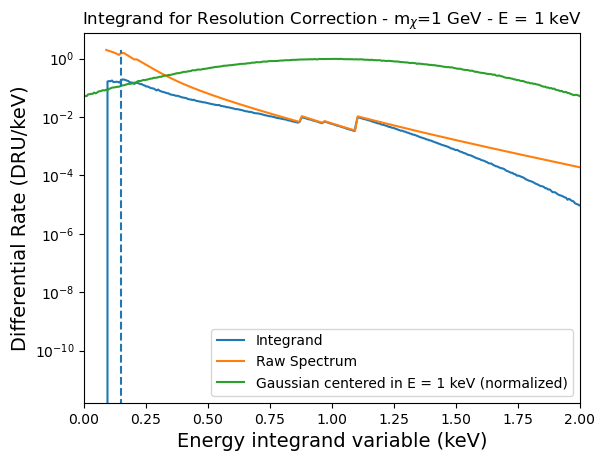

In [187]:
gauss=[]
gaussnp=[]
gauss=np.random.normal(1.001,std[89],2000000)
gaussnp=np.histogram(gauss,binenergy,density=True)

print(mdm[25],energy[89])
plt.title('Integrand for Resolution Correction - m$_\chi$=1 GeV - E = 1 keV')
plt.plot(binenergy,gaussnpfinalamp[89],label='Integrand')
plt.plot(energy,rateamp,label='Raw Spectrum')
plt.plot(binenergy[:-1],gaussnp[0],label='Gaussian centered in E = 1 keV (normalized)')
plt.vlines(0.15,0,np.max(rateamp),linestyle='dashed')
plt.xlabel('Energy integrand variable (keV)',fontsize=14)
plt.ylabel('Differential Rate (DRU/keV)',fontsize=14)
#plt.ylim(0,0.3)
plt.xlim(0,2)
plt.legend()
plt.yscale('log')

1000000 100000


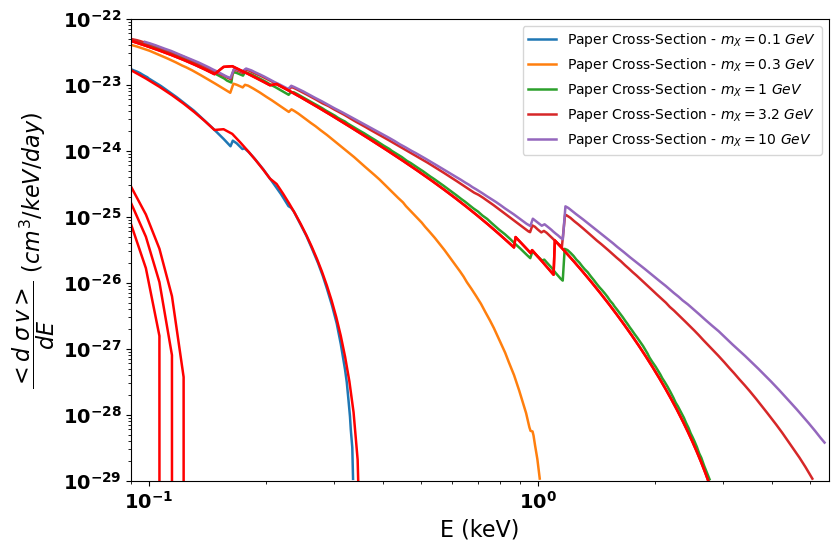

In [5]:
arq = open('velavgxs_heavydp_01GeV.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split(" ")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
Etext_01GeV=np.zeros(N1)
xs_heavydptext_01GeV=np.zeros(N1)

for i in range(N1):
    Etext_01GeV[i]=texto1[i][0]
    xs_heavydptext_01GeV[i]=10**texto1[i][1]
    
arq = open('velavgxs_heavydp_03GeV.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
Etext_03GeV=np.zeros(N1)
xs_heavydptext_03GeV=np.zeros(N1)

for i in range(N1):
    Etext_03GeV[i]=texto1[i][0]
    xs_heavydptext_03GeV[i]=10**texto1[i][1]
    
arq = open('velavgxs_heavydp_32GeV.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
Etext_32GeV=np.zeros(N1)
xs_heavydptext_32GeV=np.zeros(N1)

for i in range(N1):
    Etext_32GeV[i]=texto1[i][0]
    xs_heavydptext_32GeV[i]=10**texto1[i][1]
    
arq = open('velavgxs_heavydp_1GeV.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
Etext_1GeV=np.zeros(N1)
xs_heavydptext_1GeV=np.zeros(N1)

for i in range(N1):
    Etext_1GeV[i]=texto1[i][0]
    xs_heavydptext_1GeV[i]=10**texto1[i][1]
    
arq = open('velavgxs_heavydp_10GeV.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
Etext_10GeV=np.zeros(N1)
xs_heavydptext_10GeV=np.zeros(N1)

for i in range(N1):
    Etext_10GeV[i]=texto1[i][0]
    xs_heavydptext_10GeV[i]=10**texto1[i][1]
        
arq = open('velavgxs_lightdp_1GeV.tsv', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
Etext_1GeV_lightDP=np.zeros(N1)
xs_lightdptext_1GeV=np.zeros(N1)

for i in range(N1):
    Etext_1GeV_lightDP[i]=texto1[i][0]
    xs_lightdptext_1GeV[i]=10**texto1[i][1]
    
print(mdm[25],mdm[18])
plt.figure(figsize=(9,6))
plt.plot(Etext_01GeV,xs_heavydptext_01GeV,label='Paper Cross-Section - $m_X=0.1~GeV$',linewidth=1.8)
plt.plot(Etext_03GeV,xs_heavydptext_03GeV,label='Paper Cross-Section - $m_X=0.3~GeV$',linewidth=1.8)
plt.plot(Etext_1GeV,xs_heavydptext_1GeV,label='Paper Cross-Section - $m_X=1~GeV$',linewidth=1.8)
plt.plot(Etext_32GeV,xs_heavydptext_32GeV,label='Paper Cross-Section - $m_X=3.2~GeV$',linewidth=1.8)
plt.plot(Etext_10GeV,xs_heavydptext_10GeV,label='Paper Cross-Section - $m_X=10~GeV$',linewidth=1.8)
#plt.plot(Etext_1GeV_lightDP,xs_lightdptext_1GeV,label='Paper Cross-Section - $m_X=1~GeV$',linewidth=1.8)
plt.plot(energy,specmed[25],c='red',linewidth=1.8)
plt.plot(energy,specmed[18],c='red',linewidth=1.8)
plt.plot(energy,specmed[1],c='red',linewidth=1.8)
plt.plot(energy,specmed[2],c='red',linewidth=1.8)
plt.plot(energy,specmed[3],c='red',linewidth=1.8)
plt.plot(energy,specmed[25],c='red',linewidth=1.8)
#plt.plot(energy,specmax[18],c='blue',linewidth=1.8)
#plt.plot(energy,specmin[1],c='red',linewidth=1.8)
#plt.plot(energy,specmin[2],c='red',linewidth=1.8)
#plt.plot(energy,specmin[3],c='red',linewidth=1.8)
#plt.plot(energy,specmin[4],c='red',linewidth=1.8)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.09,5.6)
plt.ylim(1E-29,1E-22)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.xlabel('E (keV)',fontsize=16)
plt.ylabel('$\dfrac{<d~\sigma\,v>}{dE}~(cm^3/keV/day)$',fontsize=16,fontweight='bold')
#plt.ylim(10**(-30),10**(-25))
plt.legend(fontsize=10)
plt.show()

60000 0.0


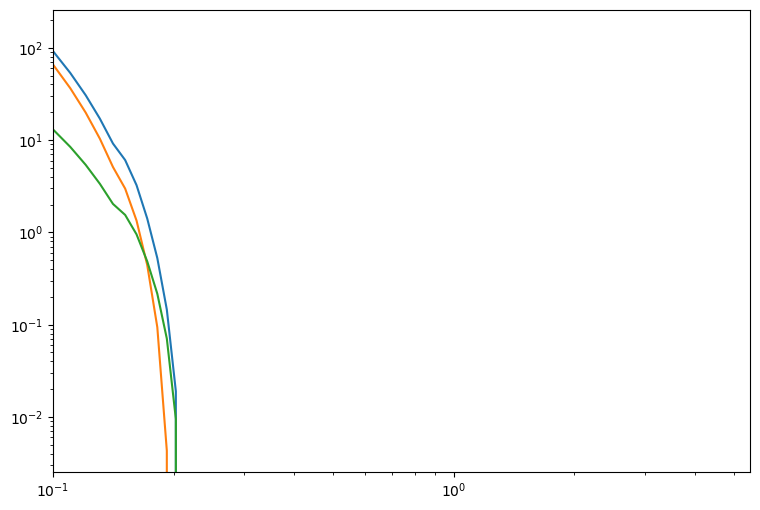

In [4]:
nt=10**3*6.02*10**23/149.89 #Number of I atoms per NaI kg
rho_DM = 0.4 #GeV/cm^3
ratemax=np.zeros((len(mdm),500))
#ratemed=np.zeros((len(mdm),500))
ratemin=np.zeros((len(mdm),500))
rateamp=np.zeros((len(mdm),500))
    
for m in range(len(mdm)):
    for i in range(500):
        #ratemed[i]=nt*rho_DM/(mdm[m]/10**6)*specmed[m][i]
        ratemin[m][i]=nt*rho_DM/(mdm[m]/10**6)*specmin[m][i]
        ratemax[m][i]=nt*rho_DM/(mdm[m]/10**6)*specmax[m][i]
        rateamp[m][i]=nt*rho_DM/(mdm[m]/10**6)*(specmax[m][i]-specmin[m][i])/2
    
def ratefunc(m,en):
    funcmin=inter.interp1d(energy,ratemin[m])
    funcmax=inter.interp1d(energy,ratemax[m])
    funcamp=inter.interp1d(energy,rateamp[m])
    
    return funcamp(en)
    
print(mdm[10],ratefunc(10,1.0))
plt.figure(figsize=(9,6))
#plt.plot(energy,ratemed[0])
#plt.plot(energy,ratemed[1])
#plt.plot(energy,ratemed[2])
#plt.plot(energy,ratemed[3])
#plt.plot(energy,ratemed[4])
plt.plot(energy,ratemax[10])
plt.plot(energy,ratemin[10])
plt.plot(energy,rateamp[10])
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,5.5)
#plt.ylim(0,0.05)
plt.show()

nan


C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_55156\3045240853.py:1: RuntimeWarning: invalid value encountered in true_divide
  func=inter.interp1d(energy,rateamp[0]/((ratemax[0]+ratemin[0])/2))
C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_55156\3045240853.py:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(energy,rateamp[0]/((ratemax[0]+ratemin[0])/2))


(0.0, 1.2)

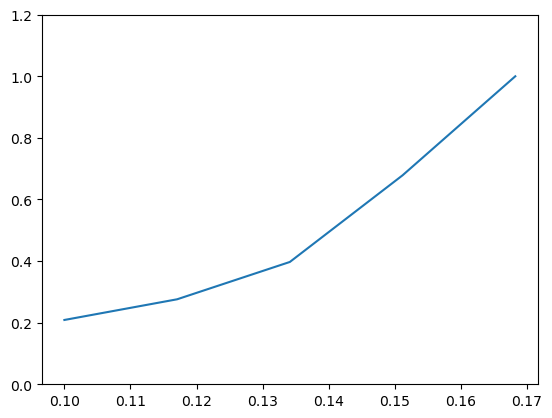

In [13]:
func=inter.interp1d(energy,rateamp[0]/((ratemax[0]+ratemin[0])/2))
print(func(1.0))

plt.plot(energy,rateamp[0]/((ratemax[0]+ratemin[0])/2))
plt.ylim(0,1.2)

In [86]:
mdm=[30000,32000,34000,36000,38000,40000,43000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,140000,180000,200000,300000,500000,700000,1000000,1500000,2000000,4000000,6000000,8000000,10000000]
print(len(mdm))
energy=np.linspace(0.09,5,600)

rateres_dama=np.zeros((len(mdm),len(energy)))
for m in range(len(mdm)):
    arq=open('./correctedspectra/DAMA_I_m%s_mod.txt' % "{:.1f}".format(mdm[m]),'r')
    texto1 = arq.readlines() #salva cada linha do arquivo como uma string
    arq.close()
    for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
        texto1[i] = texto1[i].split("\t")
        texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
    N1=len(texto1)
    endama=np.zeros(N1)
    for i in range(N1):
        endama[i]=texto1[i][0]
        rateres_dama[m][i]=texto1[i][1] #DRU
            
rateres_cosine_15NPE=np.zeros((len(mdm),5,len(energy)))
for m in range(len(mdm)):
    crystal=[2,3,4,6,7]
    for k in range(5):
        arq=open('./correctedspectra/COSINE_I_m%s_15NPE_c%s.txt' % ("{:.1f}".format(mdm[m]),crystal[k]),'r')
        texto1 = arq.readlines() #salva cada linha do arquivo como uma string
        arq.close()
        for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
            texto1[i] = texto1[i].split("\t")
            texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
        N1=len(texto1)
        encosine=np.zeros(N1)
        for i in range(N1):
            encosine[i]=texto1[i][0]
            rateres_cosine_15NPE[m][k][i]=texto1[i][1] #DRU

ratebin_dama=np.zeros((len(mdm),9))
binen_dama=np.zeros(9)
for m in range(len(mdm)):
    ratefunc_dama=inter.interp1d(energy,rateres_dama[m])
    def integrand(x):
        return (ratefunc_dama(x))
    lowen=0.75
    highen=1.0
    for i in range(9):
        binen_dama[i]=(highen+lowen)/2
        I = quad(integrand, lowen, highen)
        if (i==0):
            ratebin_dama[m][i]=I[0]/0.25 #events/day/keV/kg
            lowen=lowen+0.25
            highen=lowen+0.5
        if (i!=0):
            ratebin_dama[m][i]=I[0]/0.5 #events/day/keV/kg
            lowen=lowen+0.5
            highen=lowen+0.5
print(binen_dama)
        
ratebin_cosine_15NPE=np.zeros((len(mdm),5,17))
binen_cosine_15NPE=np.zeros(17)
for m in range(len(mdm)):
    for k in range(5):
        ratefunc_cosine_15NPE=inter.interp1d(energy,rateres_cosine_15NPE[m][k])
        def integrand(x):
            return (ratefunc_cosine_15NPE(x))
        lowen=0.7
        highen=1.0
        for i in range(17):
            binen_cosine_15NPE[i]=(highen+lowen)/2
            I = quad(integrand, lowen, highen)
            if (i==0):
                ratebin_cosine_15NPE[m][k][i]=I[0]/0.3 #events/day/keV/kg
                lowen=lowen+0.3
                highen=lowen+0.25
            if (i!=0):
                ratebin_cosine_15NPE[m][k][i]=I[0]/0.25 #events/day/keV/kg
                lowen=lowen+0.25
                highen=lowen+0.25
print(binen_cosine_15NPE)

#for m in range(len(mdm)):
#    f=open('./correctedspectra/DAMA_I_m%s_bin.txt' % "{:.1f}".format(mdm[m]),'w')
#    for i in range(len(binen_dama)):
#        print("{:.5e}".format(binen_dama[i]),file=f,end="\t")
#        print("{:.5e}".format(ratebin_dama[m][i]),file=f,end="\n")
#f.close()

#for m in range(len(mdm)):
#    crystal=[2,3,4,6,7]
#    for k in range(5):
#        f=open('./correctedspectra/COSINE_I_m%s_15NPE_c%s_bin_lightDP.txt' % ("{:.1f}".format(mdm[m]),crystal[k]),'w')
#        for i in range(len(binen_cosine_15NPE)):
#            print("{:.5e}".format(binen_cosine_15NPE[i]),file=f,end="\t")
#            print("{:.5e}".format(ratebin_cosine_15NPE[m][k][i]),file=f,end="\n")
#    f.close()

32


C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_121612\2068837875.py:45: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = quad(integrand, lowen, highen)
C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_121612\2068837875.py:45: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = quad(integrand, lowen, highen)
C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_121612\2068837875.py:45: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimate

[0.875 1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75 ]


C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_121612\2068837875.py:67: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = quad(integrand, lowen, highen)
C:\Users\Luis Eduardo\AppData\Local\Temp\ipykernel_121612\2068837875.py:67: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I = quad(integrand, lowen, highen)


[0.85  1.125 1.375 1.625 1.875 2.125 2.375 2.625 2.875 3.125 3.375 3.625
 3.875 4.125 4.375 4.625 4.875]


0.5 0.1 10.0 0.06


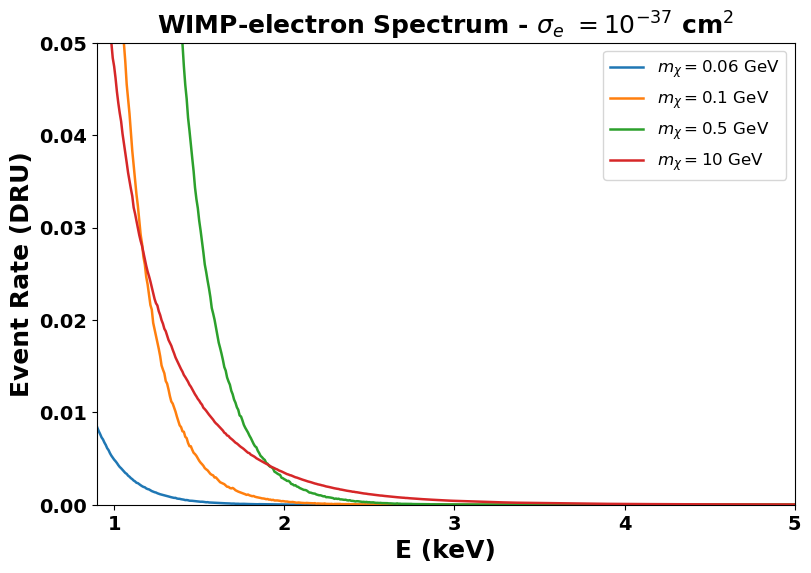

In [81]:
arq=open('DAMAspec_paper_F1.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
endamapaper=np.zeros(N1)
ampdamapaper=np.zeros(N1)
for i in range(N1):
    endamapaper[i]=texto1[i][0]
    ampdamapaper[i]=texto1[i][1] #DRU

# Fit for WIMP expected modulation (A*cos(w*(t-t0)))
encos_1=[1.5,2.5,3.5,4.5]
ampcos_1=[0.01570,0.01288,0.004691,-0.007644];
errampcos_1=[0.008372,0.009182,0.009482,0.009195];

endama_1=np.linspace(1.25,4.75,8)
ampdama_1=[0.0263,0.0207,0.0194,0.0202,0.01816,0.0129,0.0132,0.00669]
errampdama_1=[0.0052,0.0043,0.0028,0.0029,0.0028,0.0025,0.0022,0.0020]

endama_075=[0.875,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75]
ampdama_075=[0.01959,0.0263,0.0207,0.0194,0.0202,0.01816,0.0129,0.0132,0.00669]
errampdama_075=[0.00834,0.0048,0.0039,0.0026,0.0028,0.0027,0.0023,0.0020,0.0019]

mtest=23
print(mdm[mtest]/10**6,mdm[18]/10**6,mdm[31]/10**6,mdm[10]/10**6)
plt.figure(figsize=(9,6))
#plt.errorbar(encos_1,ampcos_1,xerr=[0.5,0.5,0.5,0.5],yerr=errampcos_1,fmt='bo',linewidth=1.5,markersize=6.0,capsize=4,label='COSINE WIMP Modulation')
#plt.errorbar(endama_1,ampdama_1,xerr=0.25,yerr=errampdama_1,fmt='ro',linewidth=1.5,markersize=6.0,capsize=4,label='DAMA WIMP Modulation')
#plt.errorbar(endama_075,ampdama_075,xerr=[0.125,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25],yerr=errampdama_075,fmt='ro',linewidth=1.5,markersize=6.0,capsize=4,label='DAMA Modulation - 0.75 keV')
#plt.plot(energy,1.28*(10**(-37)/10**(-37))*rateres_dama[mtest],linewidth=1.8,label='Calculated DAMA Spectrum')
plt.plot(energy,(10**(-37)/10**(-37))*rateres_cosine_15NPE[10][0],linewidth=1.8,label='$m_{\chi}=0.06~$GeV')
plt.plot(energy,(10**(-37)/10**(-37))*rateres_cosine_15NPE[18][0],linewidth=1.8,label='$m_{\chi}=0.1~$GeV')
plt.plot(energy,(10**(-37)/10**(-37))*rateres_cosine_15NPE[mtest][0],linewidth=1.8,label='$m_{\chi}=0.5~$GeV')
plt.plot(energy,(10**(-37)/10**(-37))*rateres_cosine_15NPE[31][0],linewidth=1.8,label='$m_{\chi}=10~$GeV')

#plt.plot(energy,(10**(-37)/10**(-37))*rateres_cosine_22NPE[mtest],linewidth=1.8,label='COSINE Spectrum - 22 NPE',c='orange')
#plt.plot(energy,ratefunc(mtest,energy),label='My Calculated Amplitude (w/o resolution)')
#plt.plot(endamapaper,ampdamapaper,linewidth=1.8,label='Spectrum from Paper')
#plt.stairs(4.986260297381745*ratebin_cosine_15NPE[mtest],plot,color='red',linewidth=1.8,label='Amplitude fitted to COSINE 1-5 keV - 15 NPE')
#plt.errorbar(1.5,(ampdama[0]+ampdama[1])/2,xerr=0.5,yerr=((errampdama[0]**2+errampdama[1]**2))**0.5,linewidth=1.5,markersize=6.0,capsize=4,fmt='ro',label='DAMA 1-2 keV bin averaged amplitude')
#plt.scatter(endama_075,1.44*ratebin_dama[mtest],s=10.0,c='red')
plt.xlim(0.9,5)
plt.ylim(0.0,0.05)
plt.xticks([1.0,2.0,3.0,4.0,5.0],fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.title('WIMP-electron Spectrum - $\sigma_e$ $= 10^{-37}$ cm$^2$',fontsize=18,fontweight='bold')
plt.xlabel('E (keV)',fontsize=18,fontweight='bold')
plt.ylabel('Event Rate (DRU)',fontsize=18,fontweight='bold')
plt.legend(fontsize=12)
plt.savefig('./images/WIMPelectron_cosinespectrum.png',dpi=200)
plt.show()

In [87]:
from scipy.optimize import curve_fit

arq = open('Feldman_Cousins.txt', 'r')
texto1 = arq.readlines()
arq.close()

for i in range(len(texto1)):
    texto1[i] = texto1[i].split(" ")
    texto1[i] = [float(x) for x in texto1[i]]

N1=len(texto1)
x0=np.zeros(N1)
#For 90% C.L.
lowlim=np.zeros(N1) 
uplim=np.zeros(N1) 

for i in range(N1):
    x0[i]=texto1[i][0]
    lowlim[i]=texto1[i][3]
    uplim[i]=texto1[i][4]
uplimfunc=inter.interp1d(x0,uplim)
    
#upperlim_15NPE_1=np.zeros(len(mdm))
#xsecalc_cosine_15NPE_1=np.zeros(len(mdm))
#sigmaxsecalc_cosine_15NPE_1=np.zeros(len(mdm))

#for m in range(len(mdm)):
#    ampfunc_cosine_15NPE_1=inter.interp1d(encos_1,ratebin_cosine_15NPE[m])
    
#    def function(x, a):
#        return (a/10**(-37))*ampfunc_cosine_15NPE_1(x)

#    popt, pcov = curve_fit(function, encos_1, ampcos_1, sigma=errampcos_1)
#    xsecalc_cosine_15NPE_1[m]=popt
#    sigmaxsecalc_cosine_15NPE_1[m]=pcov**0.5
#    gauss=[]
#    gauss=np.random.normal(xsecalc_cosine_15NPE[m],sigmaxsecalc_cosine_15NPE[m],200000)
#    limit_90=az.hdi(gauss,hdi_prob=0.90)
#    limit_68=az.hdi(gauss,hdi_prob=0.6827)
#    limits[m]=limit_90[1]
#    plt.hist(gauss,1000)
#    plt.vlines(limit_68[0],0,500,linestyle='dashed',color='green')
#    plt.vlines(limit_68[1],0,500,linestyle='dashed',color='green')
#    plt.vlines(limit_90[1],0,500,linestyle='dashed',color='red')
#    plt.show()
#    print(mdm[m],upperlim_15NPE_1[m])
    
#xsecalc_DAMA_1=np.zeros(len(mdm))
#sigmaxsecalc_DAMA_1=np.zeros(len(mdm))

#for m in range(len(mdm)):
#    ampfunc_DAMA_1=inter.interp1d(endama_1,ratebin_DAMA_1[m])
    
#    def function(x, a):
#        return (a/10**(-37))*ampfunc_DAMA_1(x)

#    popt, pcov = curve_fit(function, endama_1, ampdama_1, sigma=errampdama_1)
#    xsecalc_DAMA_1[m]=popt
#    sigmaxsecalc_DAMA_1[m]=pcov**0.5
#    print(mdm[m],xsecalc_DAMA_1[m])
    
xsecalc_DAMA_075=np.zeros(len(mdm))
sigmaxsecalc_DAMA_075=np.zeros(len(mdm))
print(len(endama_075))
for m in range(len(mdm)):
    ampfunc_DAMA_075=inter.interp1d(endama_075,ratebin_dama[m])
    
    def function(x, a):
        return (a/10**(-37))*ampfunc_DAMA_075(x)

    popt, pcov = curve_fit(function, endama_075, ampdama_075, sigma=errampdama_075)
    xsecalc_DAMA_075[m]=popt
    sigmaxsecalc_DAMA_075[m]=pcov**0.5
    print(mdm[m],xsecalc_DAMA_075[m])

9
30000 1.0
32000 1.0
34000 1.0
36000 1.0
38000 1.0
40000 1.0
43000 1.0421172394205874e-35
45000 4.7859838344914307e-36
50000 1.3333973745412833e-36
55000 6.061487831950951e-37
60000 3.453852668728428e-37
65000 2.2724840099258575e-37
70000 1.6373098677069925e-37
75000 1.2586446931076233e-37
80000 1.0154274452220667e-37
85000 8.506991290357591e-38
90000 7.324063299711673e-38
95000 6.448973477169161e-38
100000 5.78935853376849e-38
140000 3.632610487226221e-38
180000 3.132414658576383e-38
200000 3.04143192581575e-38
300000 3.1747184245962835e-38
500000 4.1540328636834493e-38
700000 5.400971387129895e-38
1000000 7.457541366244565e-38
1500000 1.1080934732568087e-37
2000000 1.4775055922574393e-37
4000000 2.9678947479701565e-37
6000000 4.457768378973355e-37
8000000 5.9487548140436215e-37
10000000 7.437889036439778e-37


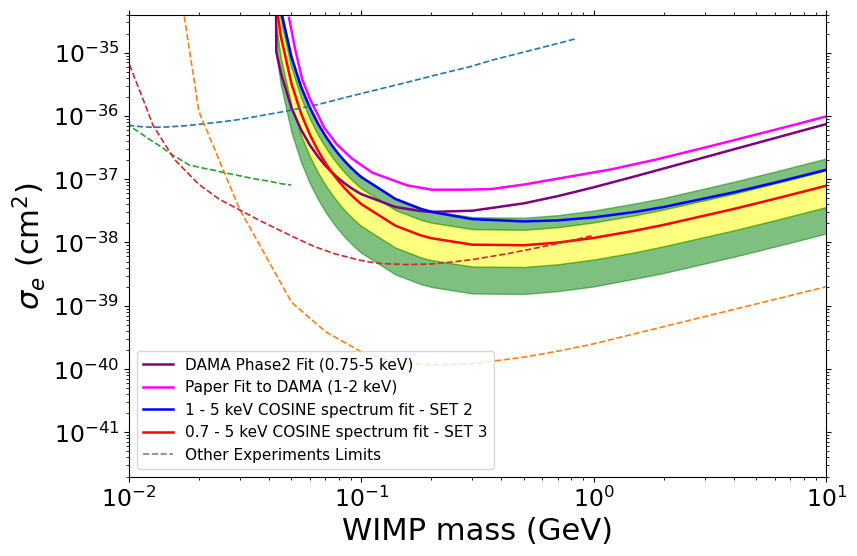

In [89]:
arq=open('DAMAfit_F1.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmdamafit=np.zeros(N1)
sigmaedamafit=np.zeros(N1)
for i in range(N1):
    mdmdamafit[i]=texto1[i][0]
    sigmaedamafit[i]=10**texto1[i][1] #DRU
    
mdmplot=np.zeros(len(mdm))
for i in range(len(mdm)):
    mdmplot[i]=mdm[i]/10**6
    
arq=open('SENSEI_limits.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmsensei=np.zeros(N1)
senseilim=np.zeros(N1)
for i in range(N1):
    mdmsensei[i]=texto1[i][0]/1000
    senseilim[i]=10**texto1[i][1] #DRU
    
arq=open('XENON1TS2_limits.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmxenon1t=np.zeros(N1)
xenon1tlim=np.zeros(N1)
for i in range(N1):
    mdmxenon1t[i]=texto1[i][0]/1000
    xenon1tlim[i]=10**texto1[i][1] #DRU
    
arq=open('XENON10_limits.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmxenon10=np.zeros(N1)
xenon10lim=np.zeros(N1)
for i in range(N1):
    mdmxenon10[i]=texto1[i][0]/1000
    xenon10lim[i]=10**texto1[i][1] #DRU
    
arq=open('PANDAX_limits.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmpanda=np.zeros(N1)
pandalim=np.zeros(N1)
for i in range(N1):
    mdmpanda[i]=texto1[i][0]/1000
    pandalim[i]=10**texto1[i][1] #DRU
    
arq=open('uplim_COSINE_set2_15NPE.txt','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split(" ")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmCOSINE=np.zeros(N1)
uplim_COSINE_set2_15NPE=np.zeros(N1)
sigma1belowuplim_COSINE_set2_15NPE=np.zeros(N1)
sigma1topuplim_COSINE_set2_15NPE=np.zeros(N1)
sigma2belowuplim_COSINE_set2_15NPE=np.zeros(N1)
sigma2topuplim_COSINE_set2_15NPE=np.zeros(N1)
for i in range(N1):
    mdmCOSINE[i]=texto1[i][0]/10**6
    uplim_COSINE_set2_15NPE[i]=texto1[i][1]
    sigma1belowuplim_COSINE_set2_15NPE[i]=texto1[i][2]
    sigma1topuplim_COSINE_set2_15NPE[i]=texto1[i][3]
    sigma2belowuplim_COSINE_set2_15NPE[i]=texto1[i][4]
    sigma2topuplim_COSINE_set2_15NPE[i]=texto1[i][5]
    
arq=open('uplim_COSINE_set3_15NPE_07.txt','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split(" ")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmCOSINE=np.zeros(N1)
uplim_COSINE_set3_15NPE_07=np.zeros(N1)
sigma1belowuplim_COSINE_set3_15NPE_07=np.zeros(N1)
sigma1topuplim_COSINE_set3_15NPE_07=np.zeros(N1)
sigma2belowuplim_COSINE_set3_15NPE_07=np.zeros(N1)
sigma2topuplim_COSINE_set3_15NPE_07=np.zeros(N1)
for i in range(N1):
    mdmCOSINE[i]=texto1[i][0]/10**6
    uplim_COSINE_set3_15NPE_07[i]=texto1[i][1]
    sigma1belowuplim_COSINE_set3_15NPE_07[i]=texto1[i][2]
    sigma1topuplim_COSINE_set3_15NPE_07[i]=texto1[i][3]
    sigma2belowuplim_COSINE_set3_15NPE_07[i]=texto1[i][4]
    sigma2topuplim_COSINE_set3_15NPE_07[i]=texto1[i][5]

plt.figure(figsize=(9,6))
plt.plot(mdmplot,xsecalc_DAMA_075,linewidth=1.8,label='DAMA Phase2 Fit (0.75-5 keV)',color='purple')
#plt.plot(mdmplot,upperlim_15NPE_1,linewidth=1.8,label='1 - 5 keV COSINE modulation - SET 3')
plt.plot(mdmdamafit,sigmaedamafit,linewidth=1.8,label='Paper Fit to DAMA (1-2 keV)',color='magenta')
plt.plot(mdmCOSINE,uplim_COSINE_set2_15NPE,linewidth=1.8,label='1 - 5 keV COSINE spectrum fit - SET 2',color='blue')
#plt.fill_between(mdmCOSINE,uplim_COSINE_set2_15NPE,sigma1belowuplim_COSINE_set2_15NPE,alpha=0.5,color='yellow')
#plt.fill_between(mdmCOSINE,uplim_COSINE_set2_15NPE,sigma1topuplim_COSINE_set2_15NPE,alpha=0.5,color='yellow')
#plt.fill_between(mdmCOSINE,sigma1belowuplim_COSINE_set2_15NPE,sigma2belowuplim_COSINE_set2_15NPE,alpha=0.5,color='green')
#plt.fill_between(mdmCOSINE,sigma1topuplim_COSINE_set2_15NPE,sigma2topuplim_COSINE_set2_15NPE,alpha=0.5,color='green')
plt.plot(mdmCOSINE,uplim_COSINE_set3_15NPE_07,linewidth=1.8,label='0.7 - 5 keV COSINE spectrum fit - SET 3',color='red')
plt.fill_between(mdmCOSINE,uplim_COSINE_set3_15NPE_07,sigma1belowuplim_COSINE_set3_15NPE_07,alpha=0.5,color='yellow')
plt.fill_between(mdmCOSINE,uplim_COSINE_set3_15NPE_07,sigma1topuplim_COSINE_set3_15NPE_07,alpha=0.5,color='yellow')
plt.fill_between(mdmCOSINE,sigma1belowuplim_COSINE_set3_15NPE_07,sigma2belowuplim_COSINE_set3_15NPE_07,alpha=0.5,color='green')
plt.fill_between(mdmCOSINE,sigma1topuplim_COSINE_set3_15NPE_07,sigma2topuplim_COSINE_set3_15NPE_07,alpha=0.5,color='green')
#plt.plot(mdmCOSINE,uplim_COSINE_set3_15NPE_1,linewidth=1.8,label='1 - 5 keV COSINE spectrum fit - SET 3',color='red')
#plt.fill_between(mdmCOSINE,uplim_COSINE_set3_15NPE_1,sigma1belowuplim_COSINE_set3_15NPE_1,alpha=0.6,color='yellow')
#plt.fill_between(mdmCOSINE,uplim_COSINE_set3_15NPE_1,sigma1topuplim_COSINE_set3_15NPE_1,alpha=0.6,color='yellow')
#plt.fill_between(mdmCOSINE,sigma1belowuplim_COSINE_set3_15NPE_1,sigma2belowuplim_COSINE_set3_15NPE_1,alpha=0.6,color='green')
#plt.fill_between(mdmCOSINE,sigma1topuplim_COSINE_set3_15NPE_1,sigma2topuplim_COSINE_set3_15NPE_1,alpha=0.6,color='green')
#plt.plot(mdmplot,xsecalc_DAMA_1,linewidth=1.8,label='Fit to DAMA (1-5 keV)',color='magenta')
#plt.plot(mdmplot,xsecalc_DAMA_075,linewidth=1.8,label='Fit to DAMA (0.75-5 keV)',color='purple')
plt.plot(mdmsensei,senseilim,linewidth=1.2,linestyle='dashed')
plt.plot(mdmxenon1t,xenon1tlim,linewidth=1.2,linestyle='dashed')
plt.plot(mdmxenon10,xenon10lim,linewidth=1.2,linestyle='dashed')
plt.plot(mdmpanda,pandalim,linewidth=1.2,linestyle='dashed')
plt.plot([1,2],[1,2],linewidth=1.2,linestyle='dashed',label='Other Experiments Limits',color='gray')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, which='both')
plt.xscale('log')
plt.yscale('log')
plt.ylim(2E-42,4E-35)
plt.xlim(0.01,10)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('WIMP mass (GeV)',fontsize=22)
plt.ylabel('$\sigma_e$ (cm$^2$)',fontsize=22)
plt.legend(fontsize=11, loc='lower left')
plt.savefig('./images/WIMPelectron_cosinelimits.png',dpi=200)
plt.show()

0.435346105254306 0.011404732958783088
0.3918114948252524 0.010264259629398777


Text(0, 0.5, '$\\sigma$/E')

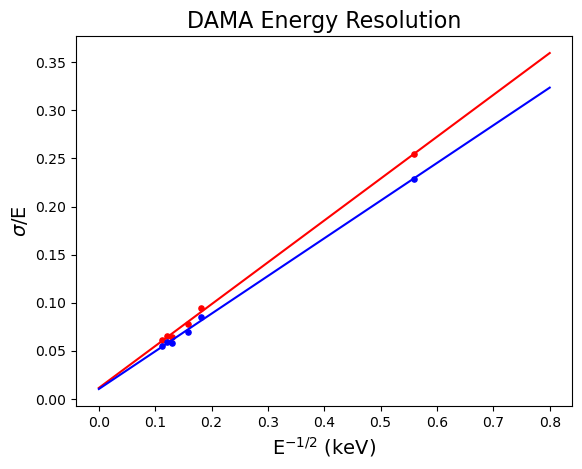

In [55]:
from scipy.optimize import curve_fit

arq=open('DAMA_enresolution.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
E_minus12=np.zeros(N1)
sigmaE_old=np.zeros(N1)
for i in range(N1):
    E_minus12[i]=texto1[i][0]
    sigmaE_old[i]=texto1[i][1] #DRU

sigmaE_new=sigmaE_old-sigmaE_old*0.1

def function(x,a,b):
    return a*x+b

popt, pcov = curve_fit(function, E_minus12, sigmaE_old)
ang_old=popt[0]
lin_old=popt[1]
print(ang_old,lin_old)

popt, pcov = curve_fit(function, E_minus12, sigmaE_new)
ang_new=popt[0]
lin_new=popt[1]
print(ang_new,lin_new)


en=np.linspace(0,0.8,1000)
plt.title('DAMA Energy Resolution',fontsize=16)
plt.scatter(E_minus12,sigmaE_old,color='red',s=14)
plt.scatter(E_minus12,sigmaE_new,color='blue',s=14)
plt.plot(en,function(en,ang_old,lin_old),color='red')
plt.plot(en,function(en,ang_new,lin_new),color='blue')
plt.xlabel('E$^{-1/2}$ (keV)',fontsize=14)
plt.ylabel('$\sigma$/E',fontsize=14)

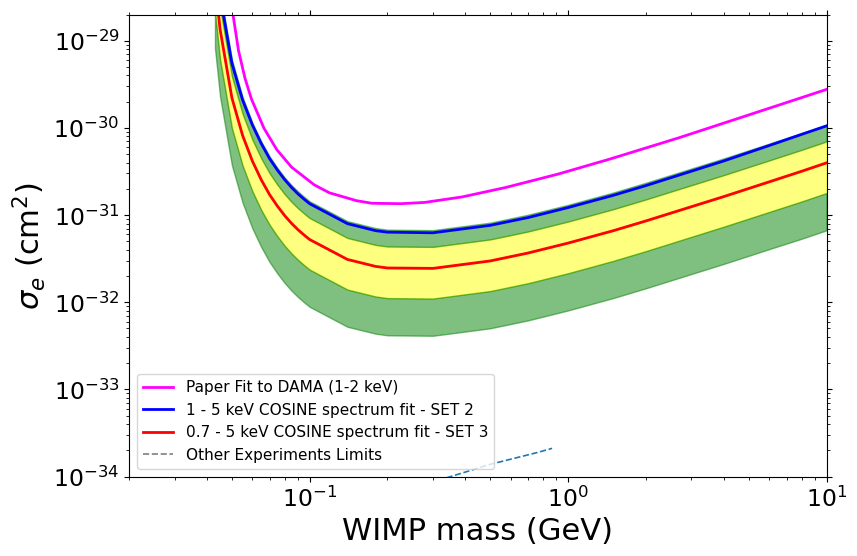

In [84]:
arq=open('DAMAfit_F1_lightDP.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmdamafit=np.zeros(N1)
sigmaedamafit=np.zeros(N1)
for i in range(N1):
    mdmdamafit[i]=texto1[i][0]
    sigmaedamafit[i]=10**texto1[i][1] #DRU
    
mdmplot=np.zeros(len(mdm))
for i in range(len(mdm)):
    mdmplot[i]=mdm[i]/10**6
    
arq=open('SENSEI_limits_lightDP.tsv','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split("\t")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmsensei=np.zeros(N1)
senseilim=np.zeros(N1)
for i in range(N1):
    mdmsensei[i]=texto1[i][0]/1000
    senseilim[i]=10**texto1[i][1] #DRU
    
#arq=open('uplim_COSINE_set2_15NPE.txt','r')
#texto1 = arq.readlines() #salva cada linha do arquivo como uma string
#arq.close()
#for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
#    texto1[i] = texto1[i].split(" ")
#    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
#N1=len(texto1)
#mdmCOSINE=np.zeros(N1)
#uplim_COSINE_set2_15NPE=np.zeros(N1)
#sigma1belowuplim_COSINE_set2_15NPE=np.zeros(N1)
#sigma1topuplim_COSINE_set2_15NPE=np.zeros(N1)
#sigma2belowuplim_COSINE_set2_15NPE=np.zeros(N1)
#sigma2topuplim_COSINE_set2_15NPE=np.zeros(N1)
#for i in range(N1):
#    mdmCOSINE[i]=texto1[i][0]/10**6
#    uplim_COSINE_set2_15NPE[i]=texto1[i][1]
#    sigma1belowuplim_COSINE_set2_15NPE[i]=texto1[i][2]
#    sigma1topuplim_COSINE_set2_15NPE[i]=texto1[i][3]
#    sigma2belowuplim_COSINE_set2_15NPE[i]=texto1[i][4]
#    sigma2topuplim_COSINE_set2_15NPE[i]=texto1[i][5]

arq=open('uplim_COSINE_set2_15NPE_lightDP.txt','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split(" ")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmCOSINE=np.zeros(N1)
uplim_COSINE_set2_15NPE=np.zeros(N1)
sigma1belowuplim_COSINE_set2_15NPE=np.zeros(N1)
sigma1topuplim_COSINE_set2_15NPE=np.zeros(N1)
sigma2belowuplim_COSINE_set2_15NPE=np.zeros(N1)
sigma2topuplim_COSINE_set2_15NPE=np.zeros(N1)
for i in range(N1):
    mdmCOSINE[i]=texto1[i][0]/10**6
    uplim_COSINE_set2_15NPE[i]=texto1[i][1]
    sigma1belowuplim_COSINE_set2_15NPE[i]=texto1[i][2]
    sigma1topuplim_COSINE_set2_15NPE[i]=texto1[i][3]
    sigma2belowuplim_COSINE_set2_15NPE[i]=texto1[i][4]
    sigma2topuplim_COSINE_set2_15NPE[i]=texto1[i][5]
    
arq=open('uplim_COSINE_set3_15NPE_07_lightDP.txt','r')
texto1 = arq.readlines() #salva cada linha do arquivo como uma string
arq.close()
for i in range(len(texto1)): #separa as colunas e elimina a ultima coluna que contem '\n'
    texto1[i] = texto1[i].split(" ")
    texto1[i] = [float(x) for x in texto1[i]] #transforma em numero os valores
N1=len(texto1)
mdmCOSINE=np.zeros(N1)
uplim_COSINE_set3_15NPE_07=np.zeros(N1)
sigma1belowuplim_COSINE_set3_15NPE_07=np.zeros(N1)
sigma1topuplim_COSINE_set3_15NPE_07=np.zeros(N1)
sigma2belowuplim_COSINE_set3_15NPE_07=np.zeros(N1)
sigma2topuplim_COSINE_set3_15NPE_07=np.zeros(N1)
for i in range(N1):
    mdmCOSINE[i]=texto1[i][0]/10**6
    uplim_COSINE_set3_15NPE_07[i]=texto1[i][1]
    sigma1belowuplim_COSINE_set3_15NPE_07[i]=texto1[i][2]
    sigma1topuplim_COSINE_set3_15NPE_07[i]=texto1[i][3]
    sigma2belowuplim_COSINE_set3_15NPE_07[i]=texto1[i][4]
    sigma2topuplim_COSINE_set3_15NPE_07[i]=texto1[i][5]

plt.figure(figsize=(9,6))
#plt.plot(mdmplot,xsecalc_DAMA_075,linewidth=2.0,label='DAMA Phase2 Fit (0.75-5 keV)',color='purple')
#plt.plot(mdmplot,upperlim_15NPE_1,linewidth=1.8,label='1 - 5 keV COSINE modulation - SET 3')
plt.plot(mdmdamafit,sigmaedamafit,linewidth=2.0,label='Paper Fit to DAMA (1-2 keV)',color='magenta')
#plt.plot(mdmCOSINE,uplim_COSINE_set2_15NPE,linewidth=1.8,label='1 - 5 keV COSINE spectrum fit - SET 2',color='blue')
#plt.fill_between(mdmCOSINE,uplim_COSINE_set2_15NPE,sigma1belowuplim_COSINE_set2_15NPE,alpha=0.5,color='yellow')
#plt.fill_between(mdmCOSINE,uplim_COSINE_set2_15NPE,sigma1topuplim_COSINE_set2_15NPE,alpha=0.5,color='yellow')
#plt.fill_between(mdmCOSINE,sigma1belowuplim_COSINE_set2_15NPE,sigma2belowuplim_COSINE_set2_15NPE,alpha=0.5,color='green')
#plt.fill_between(mdmCOSINE,sigma1topuplim_COSINE_set2_15NPE,sigma2topuplim_COSINE_set2_15NPE,alpha=0.5,color='green')
plt.plot(mdmCOSINE,uplim_COSINE_set2_15NPE,linewidth=2.0,label='1 - 5 keV COSINE spectrum fit - SET 2',color='blue')
plt.plot(mdmCOSINE,uplim_COSINE_set3_15NPE_07,linewidth=2.0,label='0.7 - 5 keV COSINE spectrum fit - SET 3',color='red')
plt.fill_between(mdmCOSINE,uplim_COSINE_set3_15NPE_07,sigma1belowuplim_COSINE_set3_15NPE_07,alpha=0.5,color='yellow')
plt.fill_between(mdmCOSINE,uplim_COSINE_set3_15NPE_07,sigma1topuplim_COSINE_set3_15NPE_07,alpha=0.5,color='yellow')
plt.fill_between(mdmCOSINE,sigma1belowuplim_COSINE_set3_15NPE_07,sigma2belowuplim_COSINE_set3_15NPE_07,alpha=0.5,color='green')
plt.fill_between(mdmCOSINE,sigma1topuplim_COSINE_set3_15NPE_07,sigma2topuplim_COSINE_set3_15NPE_07,alpha=0.5,color='green')
plt.plot(mdmsensei,senseilim,linewidth=1.2,linestyle='dashed')
plt.plot([1,2],[1,2],linewidth=1.2,linestyle='dashed',label='Other Experiments Limits',color='gray')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, which='both')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1E-34,2E-29)
plt.xlim(0.02,10)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('WIMP mass (GeV)',fontsize=22)
plt.ylabel('$\sigma_e$ (cm$^2$)',fontsize=22)
plt.legend(fontsize=11, loc='lower left')
plt.savefig('./images/WIMPelectron_cosinelimits_lightDP_paper.png',dpi=200)
plt.show()

# $\Big(\dfrac{\sigma}{E}=\dfrac{0.448}{\sqrt{E}}+0.009\Big)_{OLD}$
# $\Big(\dfrac{\sigma}{E}=\dfrac{0.403}{\sqrt{E}}+0.009\Big)_{NEW}$

In [61]:
a=[0.1,0.2,0.3]
print(a[1:])

[0.2, 0.3]
